In [6]:
#importing libraries
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
import scikitplot as skplt
warnings.filterwarnings('ignore')

#import machine learning
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

warnings.filterwarnings("ignore")

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'scikitplot'

In [8]:
train_df = pd.read_csv("GSMF_train.csv")
test_df  = pd.read_csv("GSMF_test.csv")

C:\Users\PAU\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,67,82,105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\PAU\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,32,46,58,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
train_df.head()

,tag,fund_id,category,parent_company,fund_name,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,currency,total_assets,yield,inception_date,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,pc_ratio.1,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,pe_ratio.1,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc.1,stock_percent_of_portfolio,2016_return_category,ps_ratio.1,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,84122,0ac2357e-491e-42c5-aa5e-6a2b15d1df5e,Intermediate Government,Fidelity Investments,Fidelity GNMA Fund,5,118.65,0.0,0.0,0.0,0.0,0.0,0.0,-18.65,0.00,4.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0.0,0,0,0,0,Value,USD,4.090000e+09,2.18,07/11/1985,Large,2.18,4.73,2.80,31,0.51,3.77,0.64,0,6.70,2.18,2,6.26,1.51,-2.17,2.18,2.05,0.0,1.58,4.07,0,1.20,0.0,2.05,0.06,1.64,0,0.0,0.89,0,7.91,7.00,1.51,2.97,0.60,1.75,5,0.83,0.49,1.31,99.30,0.0,5.66,-2.72,0.33,-0.27,0.03,0.11,0.00,0.13,0.66,87.45,2.11,0.01,1.51,-0.01,0.0,0.00,0.89,0.98,0.85,0.76,0.29,81.08,1.98,0.0,0.62,2.41,0.19,0.0,0.01,2.31,0.00,0.01,0.02,1.86,0.81,1.16,0.33,79.80,2.41,0.01,0.76,3.75,0.0,0.03,3.30,-0.01,0.01,0.03,0.27,2.53
1,63728,132e82e7-6357-4a15-9a08-80d8df3510e2,Long Government,DoubleLine,DoubleLine Long Duration Total Return Bond Fun...,5,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,17.19,13.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,0,0,0,0,Growth,USD,8.050000e+07,3.01,14/12/2014,Large,3.48,0.00,0.00,3,-1.81,6.20,0.59,0,0.00,3.48,1,0.00,5.19,0.00,3.48,4.56,0.0,8.40,4.77,0,1.13,0.0,4.56,0.00,1.71,0,0.0,1.18,0,0.00,0.00,1.51,0.00,-0.79,6.74,5,0.59,-1.10,4.47,99.41,0.0,0.00,0.00,0.08,-1.44,0.10,0.07,0.00,0.15,2.58,89.45,8.06,0.03,1.51,-0.02,0.0,0.00,0.89,1.33,0.86,0.00,0.00,0.00,0.00,0.0,0.00,0,0.00,0.0,0.01,0.00,-0.02,0.03,0.10,5.34,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0

In [10]:
test_df.head()

,tag,fund_id,category,parent_company,fund_name,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,currency,total_assets,yield,inception_date,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,pc_ratio.1,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,pe_ratio.1,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc.1,stock_percent_of_portfolio,2016_return_category,ps_ratio.1,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,42992,5b97a0b0-3a91-4c4a-b7ad-86741cf11bc5,Intermediate Government,BlackRock,BlackRock GNMA Portfolio Class K,-1,100.06,0.0,0.0,0.0,0.0,0.0,0.0,-0.06,7.98,3.22,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.79,0.0,0.00,0,0,0,Value,USD,450550000.0,3.68,19/12/2002,Large,2.12,4.73,2.80,15,0.51,3.77,25.39,0,6.70,2.12,1,6.33,1.51,-2.63,2.12,2.05,0.0,1.58,4.09,0,1.05,0.0,2.05,0.02,1.63,0,0.00,0.89,0.00,7.00,7.67,1.31,4.16,0.52,1.42,0,0.83,0.49,1.19,74.59,0.0,5.66,-2.72,0.02,-0.46,0.03,0.02,0.00,0.11,0.65,81.81,2.15,0.01,1.31,-0.01,0.0,0.00,0.89,0.98,0.85,0.68,0.18,74.42,1.99,0.00,0.60,2.24,0.18,0.0,0.01,2.16,0.00,0.01,0.02,1.86,0.81,1.10,0.36,68.91,2.52,0.01,0.74,3.81,0.00,0.03,3.26,-0.01,0.01,0.03,0.27,2.53
1,75959,5a824843-621b-469f-a7d3-bae5b78beece,Ultrashort Bond,Wells Fargo Funds,Wells Fargo Adjustable Rate Government Fund - ...,-1,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.23,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.74,0.0,0.00,0,0,0,Value,USD,318160000.0,1.75,29/06/2000,Large,0.76,0.34,1.99,16,1.61,2.39,3.06,0,0.25,0.76,2,0.69,0.31,0.33,0.76,1.02,0.0,1.44,1.76,0,-0.30,0.0,1.02,0.00,0.46,0,0.00,1.41,0.00,1.79,2.76,0.94,1.81,1.12,0.34,0,0.49,0.17,0.29,96.94,0.0,2.27,0.49,-8.18,-0.38,0.00,-1.07,0.19,0.08,0.04,15.22,0.36,0.00,0.94,0.00,0.0,0.01,0.17,1.75,0.14,-0.66,-0.27,3.02,0.38,0.01,0.02,-10.93,0.05,0.0,0.05,0.57,0.00,0.0

In [11]:
train_df.shape

(20000, 130)

In [12]:
test_df.shape

(5000, 130)

In [13]:
train_df.describe()

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,140262.491600,2.839750,14.432380,4.222367,5.065125,6.097179,3.428110,3.184132,0.819545,1.686225,2.506378,1.825092,2.250834,11.729584,9.072614,12.67420

In [14]:
test_df.describe()

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,ps_ratio.1,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
count,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,138344.706800,-1.0,14.730100,4.059928,4.896436,6.102902,3.577378,3.36172,0.840576,1.550940,2.543636,1.868790,2.306202,12.002384,8.783048,12.912098,3.796128,5.947880,5.246956,8.447294,4.881260

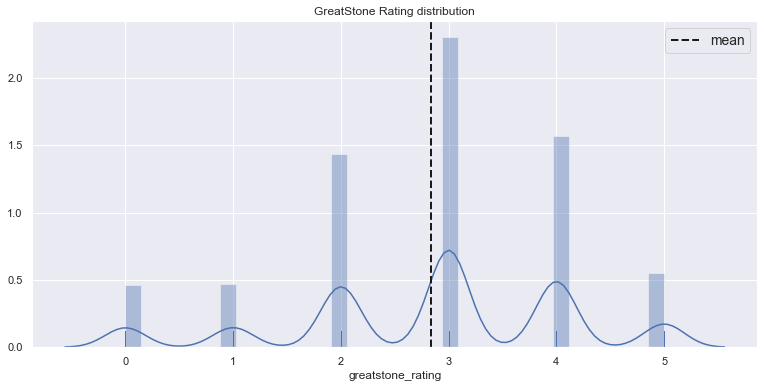

In [15]:
plt.figure(figsize=(13,6))
#using distplot() to draw a kernel density estimate line 
sns.distplot(train_df["greatstone_rating"],color="b",rug=True)
#axvline() to plot mean line 
plt.axvline(train_df["greatstone_rating"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("GreatStone Rating distribution")
plt.show()

In [16]:
train_df.cov() 

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
tag,4.335346e+09,86.493804,89172.179990,-4364.714341,9838.090603,15609.522648,-14313.079683,-15361.907677,1604.290117,1600.767531,6552.266485,7782.331226,4566.694697,4520.035487,15730.232524,10397.704566,-992.851085,-14575.196398,2584.106356,-6380.546501,-4287.210083,4716.223113,17865.883744,-1542.051949,678.033677,6.857679e+13,-781.463292,3361.947122,3196.769471,-2933.128267,13599.403493,5849.597540,12197.627567,10681.066913,1806.926320,3517.162528,3504.276768,-1384.279971,-1618.081830,11690.015462,2417.728623,168.574511,678.033677,-7029.174245,6293.344300,5990.833637,-4073.893603,168.574511,6260.419722,7658.896026,6919.456552,3950.989385,1543.212884,16741.834043,4993.284189,806.285478,2798.975034,8188.639797,86.493804,-1672.268261,9386.083343,787.040303,-13678.169269,-2972.551038,11151.952860,11490.111447,-3966.783421,-8.213568,569.445564,80.771501,375.270500,654.207240,72710.716793,7386.208943,-1.707174,4993.284189,-37.979189,4.985933,3.298593,660.597709,2101.417300,626.610012,240.922381,-2852.012603,6452.218052,5506.735888,1.490618e+01,-112.150597,226.624584,10.387146,75.547340,2447.431141,-25.891646,-1.573394,-13.950592,5959.232031,261.425713,345.741304,-2005.464355,12148.241814,13052.579620,-2.570636,-733.920483,-1.330149,-660.317557,4507.396764,-40.818132,-3.415614,-39.080832,370.582635,2365.653780
greatstone_rating,8.649380e+01,1.631852,0.886371,0.624145,0.703662,0.816229,0.435636,0.567635,0.212454,0.313464,0.530270,0.279963,-0.053748,0.235935,-0.028781,1.159102,-0.004313,0.007756,-0.083630,0.340416,0.064001,0.038766,0.447417,-0.188573,0.197601,2.683341e+09,0.193222,0.8

In [17]:
test_df.cov() 

,tag,greatstone_rating,aaa_rating,aa_rating,a_rating,bbb_rating,bb_rating,b_rating,below_b_rating,others_rating,maturity_bond,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio.1,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,ps_ratio.1,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating.1,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years.1,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
tag,4.259540e+09,0.0,24958.986657,488.573378,6502.285954,7858.405824,-19910.849647,-12366.451906,-615.351309,-6252.545087,7897.096399,4971.987201,1460.466802,5454.467044,10299.944649,-2883.980375,1104.065354,3880.157738,-6520.398510,-8411.270009,-2801.941581,-8533.131303,14309.584128,-294.858133,1378.323939,-403.450188,4.036497e+13,-33.921412,10408.300935,5334.830223,5381.969885,20505.946523,4647.289967,14006.874528,6247.627593,4961.657558,10117.403738,7351.811018,3410.260793,-2218.234580,35729.289932,10054.312621,4363.783227,1378.323939,-13906.155436,6359.152098,-8555.067864,-5104.909112,4363.783227,8272.995487,28527.456009,16161.971015,20556.071205,-403.450188,4357.084415,41559.937880,11151.376572,15455.079732,-3509.748959,7972.381452,0.0,-803.674045,-1336.898072,-1212.362561,-22860.172205,-1030.988589,26704.747256,35758.219285,-6467.006666,51.831910,1083.828838,6.212867,988.819691,1299.491636,89954.860776,17037.638354,3.857207,11151.376572,-53.774462,0.683502,2.122575,488.628127,5139.056144,434.468090,524.229755,-10523.554530,56772.209733,15693.647336,14.325211,975.508684,19161.516717,389.970329,10.709657,-18.451608,3189.776296,-78.792788,4.324043,41.517335,4929.287872,124.601558,1457.795268,-5127.305228,77143.316719,23300.242326,-2.943155,1213.987083,-4.916657,-29.836326,19066.505867,-78.140145,5.174892,-1.934730,1639.576858,4758.353637
greatstone_rating,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

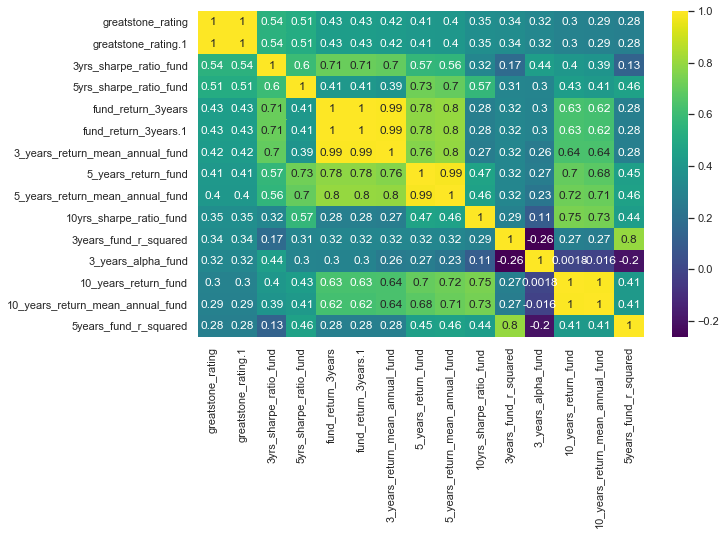

In [18]:
k = 15 #number of variables for heatmap
cols = train_df.corr().nlargest(k, 'greatstone_rating')['greatstone_rating'].index
cm = train_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

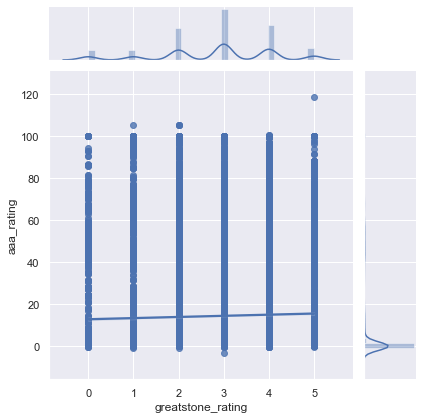

In [19]:
sns.jointplot('greatstone_rating', 'aaa_rating', data=train_df, kind='reg')

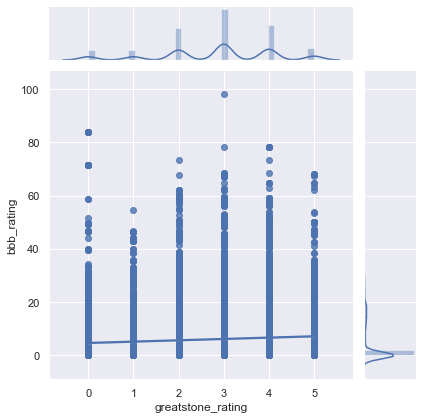

In [21]:
sns.jointplot('greatstone_rating', 'bbb_rating', data=train_df, kind='reg')

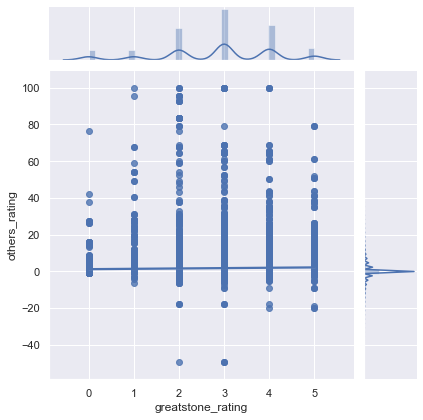

In [22]:
sns.jointplot('greatstone_rating', 'others_rating', data=train_df, kind='reg')